In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.1 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.1 MB 6.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 4.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 3.4 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.1 MB 3.1 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 3.0 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 2.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 2.6 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [13]:
import pandas as pd
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

--> Explorar os dados, suas primeiras linhas, a estrutura, e as estatisticas das colunas numericas:


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

         0         1    2    3    4    5    6    7    8    9    10   11   12  \
0  0.833333  0.019103  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.666667  0.126231  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.666667  0.178560  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500000  0.344442  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.333333  0.008637  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3100 non-null   float64
 1   1       3100 non-null   float64
 2   2       3100 non-null   float64
 3   3       3100 non-null   float64
 4   4       3100 non-null   float64
 5   5   

Para utiliizar o PCA e o DBSCAN, deve-se fazer o processamento e limpeza dos dados já que 
eles so trabalham com dados numericos, então eu devo selecionar apenas colunas numericas 
e padronizar os dados para garantir que estejam na mesma escala: (criando um dframe apenas com colunas numericas)

In [17]:
numerical_cols = df.select_dtypes(include='number').columns
df_numeric = df[numerical_cols]
print(numerical_cols)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


Agora tem que  padrinizar os dados tirando sua media e dividindo pelo desvio padrão, isso vai deixar as colunas do mesmo tamanho. o resultado deve ser um dframe como um array numpy, com linhas de registros (amostra do dtset), e colunas reprsentando variaveis (features) padronizadas. E estará pronto para ser usado no pca e no dbscan.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
print(df_scaled)

[[ 1.52186604 -0.76422648  1.09765041 ... -0.07425705  0.45256964
  -0.05688801]
 [ 0.76617411 -0.15457849  1.09765041 ... -0.07425705  0.45256964
  -0.05688801]
 [ 0.76617411  0.14322414  1.09765041 ... -0.07425705  0.45256964
  -0.05688801]
 ...
 [ 1.52186604  3.01254041 -0.91103688 ... -0.07425705 -2.2096047
  -0.05688801]
 [-2.25659361  3.57473368 -0.91103688 ... -0.07425705 -2.2096047
  -0.05688801]
 [ 0.76617411  1.98524238 -0.91103688 ... -0.07425705 -2.2096047
  -0.05688801]]


PCA: Analise de componentes principais. Ele pega um dtset grande e diminui suas dimensções (para 2) conservando no maximo a variabilidade dos dados. 
Primeiro criamos o objeto do PCA definindo os dois componentes
Depois, com os dados padronizados deve-se ajusta-los no PCA e transformar

In [22]:
pca= PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print(df_pca)

[[ 0.91980328  0.2371425 ]
 [ 0.58056323 -0.09502439]
 [ 0.41793587 -0.19941981]
 ...
 [-4.98242037 -2.36196268]
 [-5.32101278 -3.15130758]
 [-4.20204521 -1.13911461]]


*O fit_transform ajusta o pca transformando os dados nesse novo espaço e gerando uma matriz 2d

Vizualização dos dados:
*gráfico de dispersão (scatter plot) 

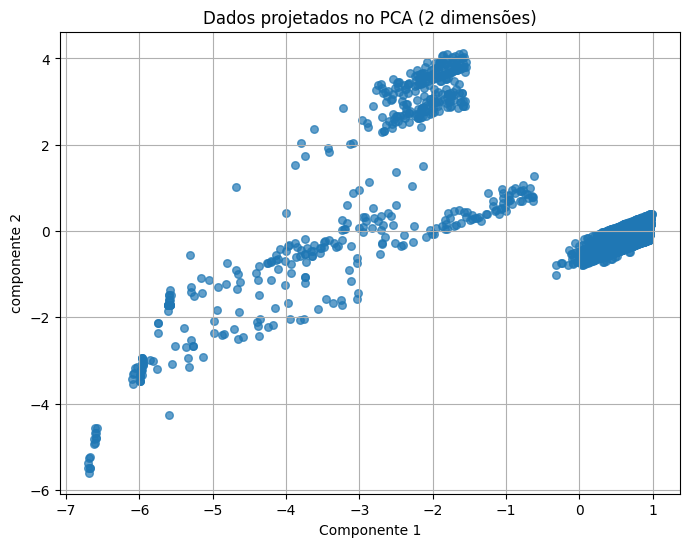

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], s=30, alpha=0.7)
plt.title('Dados projetados no PCA (2 dimensões)')
plt.xlabel('Componente 1')
plt.ylabel('componente 2')
plt.grid(True)
plt.show()


Identificar outliers e clusters
eps: raio da vizinhança
min_samples: ponto minimo para formar um cluster
o clusters será um array com -1 para outliers e números inteiros para cada cluster


pelo o que eu estudei eu devo fazer o grafico knee pra saber o valor do eps
e o min_sanples para peqienos conjuntos de dados é 4

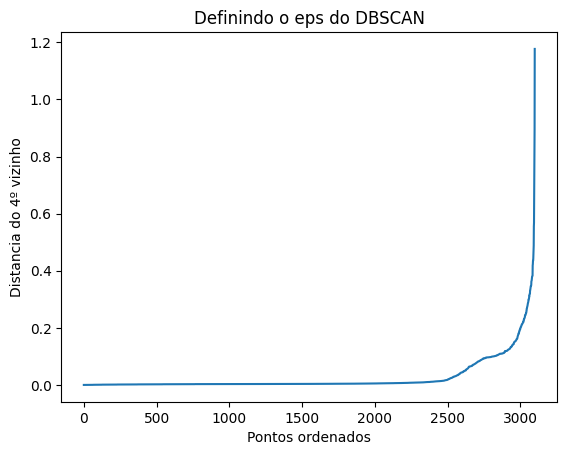

In [27]:
#eps
from sklearn.neighbors import NearestNeighbors

nn= NearestNeighbors(n_neighbors=4).fit(df_pca)
dist_4 = np.sort(nn.kneighbors(df_pca)[0][:,3])
 
 #grafico
 
plt.plot(dist_4)
plt.xlabel('Pontos ordenados')
plt.ylabel('Distancia do 4º vizinho')
plt.title('Definindo o eps do DBSCAN')
plt.show()


In [28]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
clusters= dbscan.fit_predict(df_pca)
print(f'Númereo de clusters (sem outiliers): {len(set(clusters))- (1 if -1 in clusters else 0)}' )
print(f'numero de outliers: {(clusters == -1).sum()}')


Númereo de clusters (sem outiliers): 11
numero de outliers: 122


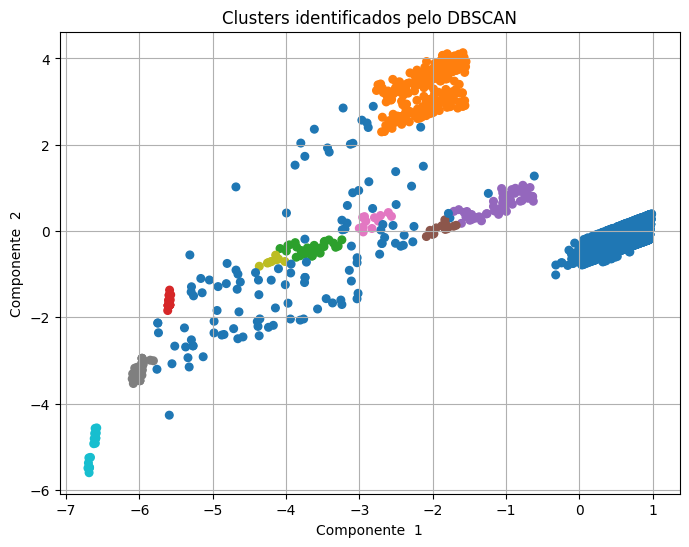

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='tab10', s=30)
plt.title('Clusters identificados pelo DBSCAN')
plt.xlabel('Componente  1')
plt.ylabel('Componente  2')
plt.grid(True)
plt.show()
